# Week 9 handin

In [ ]:
## Assignment

## Ex 1
`Data = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'`
### Download the data

- Programatically download the data from the above link.
- Import the data into a Pandas dataframe.
- Show the head of the Pandas dataframe.

### Feature engineering
- Reduce the dataset by:
  - Make == Honda
  - Fueltype == Gasoline
  - Remove outliers. Hint: `df[column name'] < df['column name'].quantile(0.90)`
  - Only use 2 features: 'Fuel Information.Highway mpg' and 'Engine Information.Engine Statistics.Horsepower'
  - Normalize data (reduce values to be between 0 and 1)
  
### Linear regression

- Perform linear regression where x = horsepower and y = mpg
- What is the coefficient (slope) of your model? What does this number mean?
- According to your model, what is `y` when `x=1`.
- Show the regression line on a scatterplot with the other datapoints.

## Status
I have completed all exercises

In [2]:
#ex 1
import pandas as pd 

df = pd.read_csv('https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv')


df.head()


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [7]:
#ex 2

from sklearn import preprocessing

make = "Identification.Make"
fuel_type = "Fuel Information.Fuel Type"
highway_mpg = "Fuel Information.Highway mpg"
horsepower = "Engine Information.Engine Statistics.Horsepower"

reduced = df[(df[make] == "Honda") & (df[fuel_type] == "Gasoline")] 
noOutliers = reduced[(reduced[highway_mpg] < reduced[highway_mpg].quantile(0.90)) & (reduced[horsepower] < reduced[horsepower].quantile(0.90))]

horse_high = noOutliers[[horsepower, highway_mpg]]
result = preprocessing.normalize(horse_high)
new_df = pd.DataFrame(result, columns=horse_high.columns)



### Linear regression

Coefficient: [-0.07727343]


<AxesSubplot:xlabel='Engine Information.Engine Statistics.Horsepower', ylabel='Fuel Information.Highway mpg'>

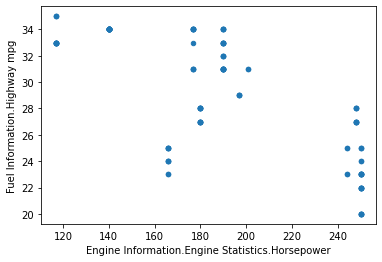

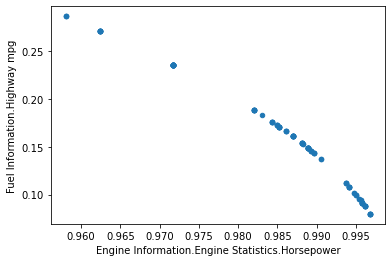

In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np

x = horse_high[horsepower]
y = horse_high[highway_mpg]

x_reshape = np.array(x).reshape(-1, 1)

model = LinearRegression()

model.fit(x_reshape, y)

# med "coefficient" kan vi se hvor meget "highway mpg" falder for hver extra horsepower
print("Coefficient:", model.coef_)

horse_high.plot.scatter(x=0, y=1)
new_df.plot.scatter(x=0, y=1)